In [2]:
import logging
import os

logger = logging.getLogger('experiment')

import itertools
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from cnpy import utils
import ast
import mysql.connector
import time
import random

results_dict = {}
std_dict = {}
all_experiments = []
folders = []
all_experiments = {}
legend = []
colors = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))




In [3]:
with open("credentials.json") as f:
        db_data = json.load(f)

In [4]:
def run_query(database, query):
    db_name = database
    query = query
    conn = mysql.connector.connect(
    host=db_data['database'][0]["ip"],
    user=db_data['database'][0]["username"],
    password=db_data['database'][0]["password"])
  
    sql_run = conn.cursor()
    sql_run.execute("USE " + db_name+ ";")
    
    output = sql_run.execute(query)
    output = sql_run.fetchall()
    return output

def plot(query, plt, title):
    output = run_query(db_name, query)
    results_dict = {}
    x = []
    y = []
    err = []
    flag = True

    for d in output:
        if d[1] is not None and d[1] < 10000:
            x.append(d[0])
            if(d[1] is None):
                continue
            else:
                y.append(d[1])
                err.append(d[2])

    if flag:
        plt.errorbar(x, y, err, label=title)
    return plt

$$y(t) = \sum_{i=0}^k w_i(t) x_i(t)$$
$$y^*(t) = \sum_{i=0}^k w^*_i(t) x_i(t)$$
Where $w^*$ are randomly initalized to be -1 or +1. <br>
Every 50 steps, one randomly chosen $w^*_i$ changes from +1 to -1 

## LMS
$$w_i(t+1) = w_i(t) + \alpha \delta(t) x_i(t)$$
where  $\delta(t) = y^*(t) - y(t)$.

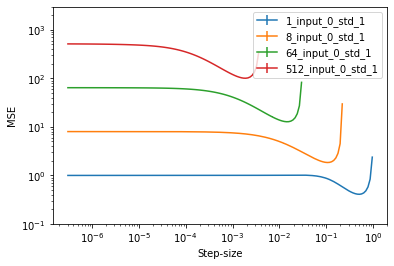

In [5]:
db_name = "khurram_role_of_normalization_experiments_exp_1_0"

features = ["1", "8", "64", "512"]
inputs = ["0" ]
standard = ["1"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, dist + "_input_" + inp + "_std_" + std)
        
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(0.1, 3000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("exp_1_role_of_features.pdf", format="pdf")
plt.show()
        

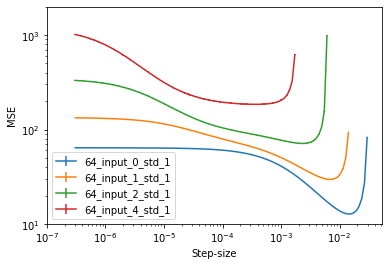

In [6]:
db_name = "khurram_role_of_normalization_experiments_exp_1_1"

features = ["64"]
inputs = ["0", "1", "2", "4"]
standard = ["1"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, dist + "_input_" + inp + "_std_" + std)
            
plt.xlabel('Step-size')
plt.ylabel("MSE")
plt.yscale("log")
plt.ylim(10, 2000)
plt.xscale("log")
plt.xlim(1e-7)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("exp_1_mean_of_feature.pdf", format="pdf")
plt.show()
        

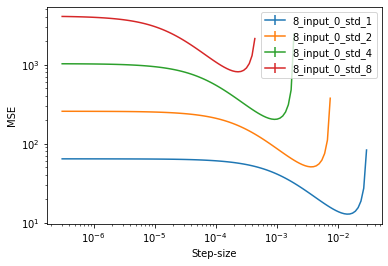

In [7]:
db_name = "khurram_role_of_normalization_experiments_exp_1_2"

features = ["8"]
inputs = ["0" ]
standard = ["1", "2", "4", "8"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms' and features = 64 and input_mean = 0 and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, dist + "_input_" + inp + "_std_" + std)
            
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 1.5)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("exp_1_std_of_features.pdf", format="pdf")
plt.show()
        

## LMS with normalized step size
We can normalize the step-size by the expected value of the norm of the feature vector, i.e. <br>
let 
$$\eta(t+1) = \beta_1\eta(t) + (1-\beta_1)x(t)^Tx(t)$$
$$w_i(t+1) = w_i(t) + \frac{\alpha}{\eta(t+1)} \delta(t) x_i(t)$$

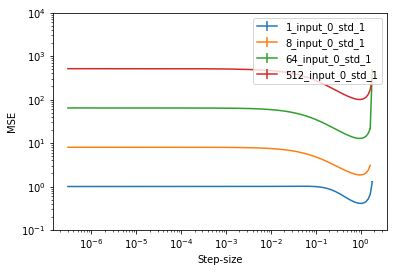

In [25]:
db_name = "khurram_role_of_normalization_experiments_exp_2"

features = ["1", "8", "64", "512"]
inputs = ["0" ]
standard = ["1"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms_normalized_step_size' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, dist + "_input_" + inp + "_std_" + std)
            
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(0.1, 10000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("exp_2_no_of_features.pdf", format="pdf")
plt.show()
        

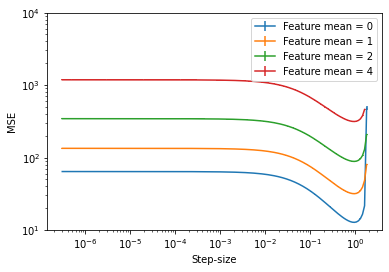

In [29]:
db_name = "khurram_role_of_normalization_experiments_exp_3_1"

features = ["64"]
inputs = ["0", "1", "2", "4"]
standard = ["1"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms_normalized_step_size_and_input' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, "Feature mean = " + inp)
            
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(10, 10000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
# plt.savefig("input_distributions_tracking_problem.pdf", format="pdf")
plt.show()
        

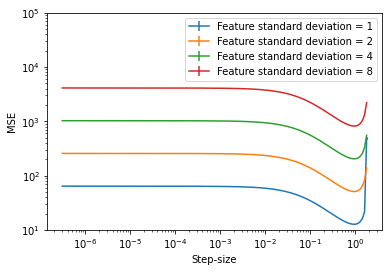

In [30]:
db_name = "khurram_role_of_normalization_experiments_exp_3_2"

features = ["64"]
inputs = ["0"]
standard = ["1", "2", "4", "8"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms_normalized_step_size_and_input' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, "Feature standard deviation = " + std)
            
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(10, 100000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
# plt.savefig("input_distributions_tracking_problem.pdf", format="pdf")
plt.show()
        

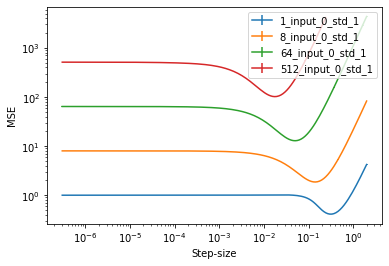

In [26]:
db_name = "khurram_role_of_normalization_experiments_exp_5_2"

features = ["1", "8", "64", "512"]
inputs = ["0"]
standard = ["1"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'adam' and b2 = 0.999 and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 1.5)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("adam_no_of_features.pdf", format="pdf")
plt.show()
        

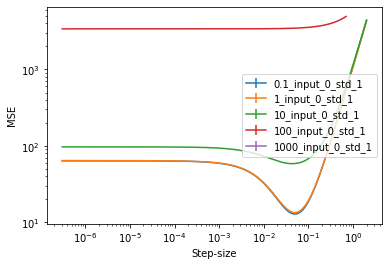

In [232]:
db_name = "khurram_role_of_normalization_experiments_exp_5_4"

noise = ["0.1", "1", "10", "100", "1000"]
inputs = ["0"]
standard = ["1"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where target_noise = "+ dist +" and algorithm = 'adam' and b2 = 0.999 and features = 64 and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 1.5)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("adam_no_of_features.pdf", format="pdf")
plt.show()
        

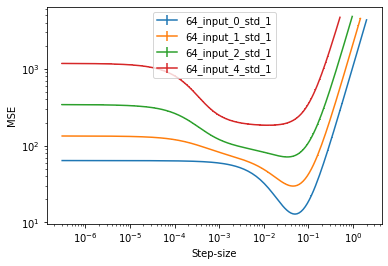

In [213]:
db_name = "khurram_role_of_normalization_experiments_exp_5_1"

noise = ["64"]
inputs = ["0", "1", "2", "4" ]
standard = ["1"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'adam' and b2 = 0.999 and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 2.5)
plt.xscale("log")
# plt.xlim(1e-4, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("adam_input_mean.pdf", format="pdf")
plt.show()
        

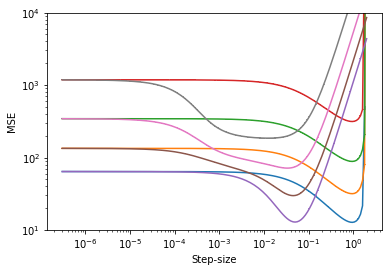

In [215]:
db_name = "khurram_role_of_normalization_experiments_exp_3_1"

features = ["64"]
inputs = ["0", "1", "2", "4"]
standard = ["1"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms_normalized_step_size_and_input' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, dist + "_input_" + inp + "_std_" + std)
            
db_name = "khurram_role_of_normalization_experiments_exp_5_1"

noise = ["64"]
inputs = ["0", "1", "2", "4" ]
standard = ["1"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'adam' and b2 = 0.999 and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            plot(query, plt, "adam" + dist + "_input_" + inp + "_std_" + std)
        
    
    
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(10, 10000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
# plt.legend()
# plt.title("Asymptotic error for different input distributions")
# plt.savefig("input_distributions_tracking_problem.pdf", format="pdf")
plt.show()
        

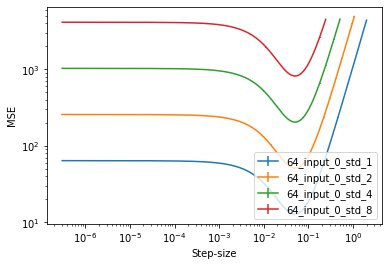

In [224]:
db_name = "khurram_role_of_normalization_experiments_exp_5_3"

noise = ["64"]
inputs = ["0"]
standard = ["1", "2", "4", "8"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'adam' and b2 = 0.999 and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 1.5)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("adam_std.pdf", format="pdf")
plt.show()
        

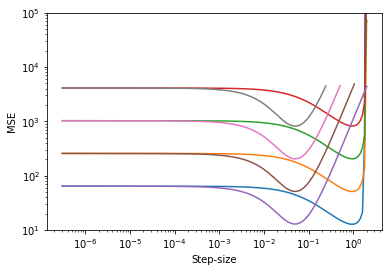

In [241]:
db_name = "khurram_role_of_normalization_experiments_exp_3_2"

features = ["64"]
inputs = ["0"]
standard = ["1", "2", "4", "8"]

for dist in features:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms_normalized_step_size_and_input' and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            plot(query, plt, dist + "_adam_input_" + inp + "_std_" + std)
            

db_name = "khurram_role_of_normalization_experiments_exp_5_3"

noise = ["64"]
inputs = ["0"]
standard = ["1", "2", "4", "8"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'adam' and b2 = 0.999 and features = "+ dist +" and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
            
            

plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(10, 100000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
# plt.legend()
# plt.title("Asymptotic error for different input distributions")
# plt.savefig("input_distributions_tracking_problem.pdf", format="pdf")
plt.show()
        

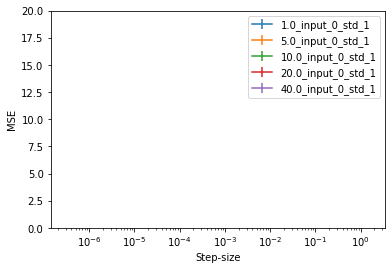

In [22]:
db_name = "khurram_role_of_normalization_experiments_exp_4"

noise = ["1.0", "5.0", "10.0", "20.0", "40.0"]
inputs = ["0"]
standard = ["1"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'lms_normalized_step_size' and features = 64 and target_noise = "+ dist +" and input_mean = 0 and input_std = 1 and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Step-size')
plt.ylabel("MSE")


# plt.yscale("log")
plt.ylim(0, 20)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
# plt.title("Asymptotic error for different input distributions")
plt.savefig("noise_level.pdf", format="pdf")
plt.show()
        

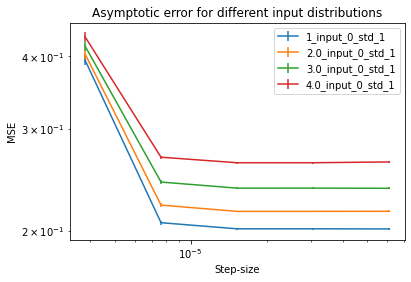

In [328]:
db_name = "khurram_role_of_normalization_experiments_exp_6"

noise = [
        "1",
        "2.0",
        "3.0",
        "4.0"]
inputs = ["0"]
standard = ["1"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select step_size, avg(asymptotic_error), std(asymptotic_error)/sqrt(count(asymptotic_error)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbd' and target_noise = "+ dist +" and meta_step_size = 0.0078125 and features = 64 and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 2)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("Asymptotic error for different input distributions")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

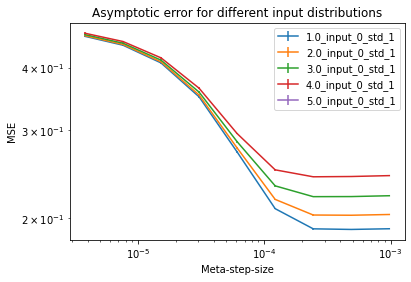

In [310]:
db_name = "khurram_role_of_normalization_experiments_exp_6"

noise = ["1.0",
        "2.0",
        "3.0",
        "4.0",
        "5.0"]
inputs = ["0"]
standard = ["1"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(asymptotic_error), std(asymptotic_error)/sqrt(count(asymptotic_error)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbd' and target_noise = "+ dist +" and step_size = 0.001953125 and features = 64 and input_mean = " +inp  + " and input_std = "+ std +" and target_mean = 0 and target_std = 1 group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
# plt.ylim(0, 2)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("Asymptotic error for different input distributions")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

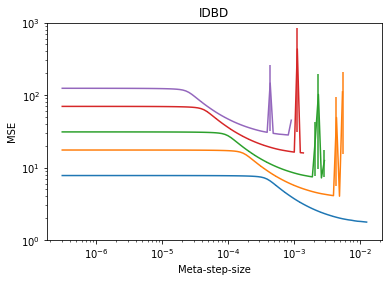

In [361]:
db_name = "khurram_role_of_normalization_experiments_exp_7"

noise = ["0.1"]
inputs = ["0"]
standard = ["1", "1.5", "2", "3", "4"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbd' and target_noise = "+ dist +" and step_size = 0.0005 and features = 8  and target_std = "+ std +" and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=dist + "_input_" + inp + "_std_" + std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 1000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
# plt.legend()
plt.title("IDBD")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

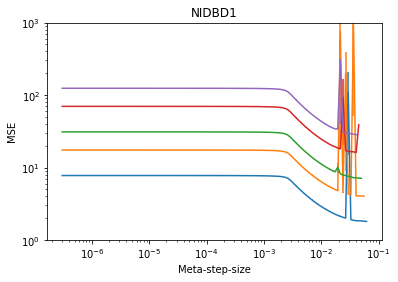

In [359]:
db_name = "khurram_role_of_normalization_experiments_exp_7_1"

noise = ["0.1"]
inputs = ["0"]
standard = ["1", "1.5", "2", "3", "4"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'nidbd1' and target_noise = "+ dist +" and step_size = 0.0005 and features = 8  and target_std = "+ std +" and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 1000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
# plt.legend()
plt.title("NIDBD1")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

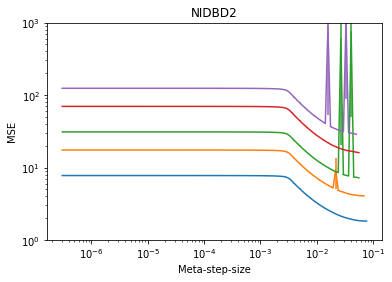

In [360]:
db_name = "khurram_role_of_normalization_experiments_exp_7_2"

noise = ["0.1"]
inputs = ["0"]
standard = ["1", "1.5", "2", "3", "4"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'nidbd2' and target_noise = "+ dist +" and step_size = 0.0005 and features = 8  and target_std = "+ std +" and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 1000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
# plt.legend()
plt.title("NIDBD2")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

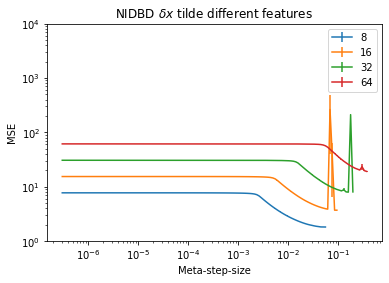

In [75]:
db_name = "khurram_role_of_normalization_experiments_exp_7_6"

noise = ["0.1"]
inputs = ["0"]
standard = ["8", "16", "32", "64"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'nidbd2' and target_noise = "+ dist +" and step_size = 0.005 and features = "+ std +" and target_std = 1 and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 10000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("NIDBD $\delta x$ tilde different features")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

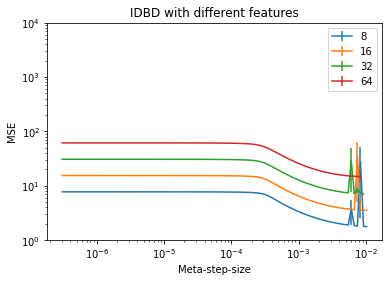

In [68]:
db_name = "khurram_role_of_normalization_experiments_exp_7_7"

noise = ["0.1"]
inputs = ["0"]
standard = ["8", "16", "32", "64"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbd' and target_noise = "+ dist +" and step_size = 0.005 and features = "+ std +" and target_std = 1 and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label=std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 10000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("IDBD with different features")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

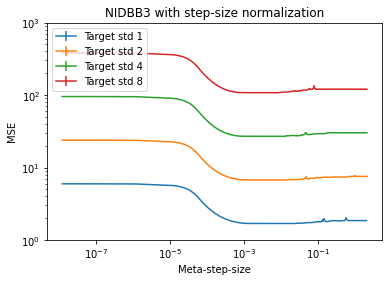

In [70]:
db_name = "khurram_role_of_normalization_experiments_exp_8_3"

noise = ["0.1"]
inputs = ["0"]
standard = ["1", "2", "4", "8"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbdbest' and target_noise = "+ dist +" and step_size = 0.05 and features = 8  and target_std = "+ std +" and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label="Target std " +std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 1000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("NIDBB3 with step-size normalization")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

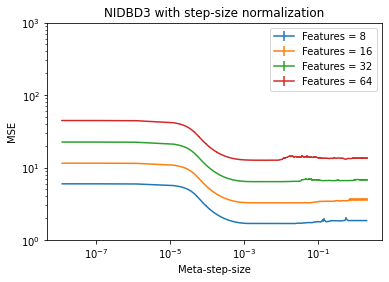

In [63]:
db_name = "khurram_role_of_normalization_experiments_exp_8_3"

noise = ["0.1"]
inputs = ["0"]
standard = ["8", "16", "32", "64"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbdbest' and target_noise = "+ dist +" and step_size = 0.05 and features = "+ std +" and target_std = 1 and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label="Features = " + std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 1000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("NIDBD3 with step-size normalization")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

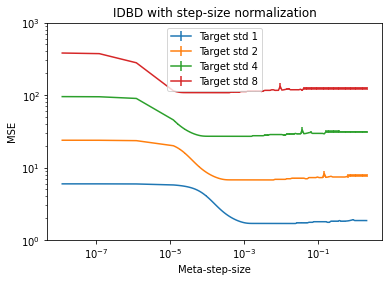

In [69]:
db_name = "khurram_role_of_normalization_experiments_exp_9_2"

noise = ["0.1"]
inputs = ["0"]
standard = ["1", "2", "4", "8"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbdnorm' and target_noise = "+ dist +" and step_size = 0.05 and features = 8  and target_std = "+ std +" and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label="Target std " + std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 1000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("IDBD with step-size normalization")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        

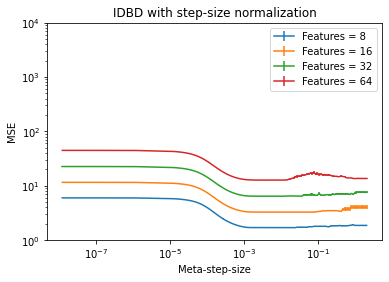

In [65]:
db_name = "khurram_role_of_normalization_experiments_exp_9_2"

noise = ["0.1"]
inputs = ["0"]
standard = ["8", "16", "32", "64"]

for dist in noise:
    for inp in inputs:
        for std in standard:
            query = "select meta_step_size, avg(sum_of_errors), std(sum_of_errors)/sqrt(count(sum_of_errors)) from error_table join runs on runs.run = error_table.run where algorithm = 'idbdnorm' and target_noise = "+ dist +" and step_size = 0.05 and features = "+ std +" and target_std = 1 and target_mean = "+ inp + " group by algorithm, features, step_size, meta_step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, meta_step_size;"
            output = run_query(db_name, query)
            results_dict = {}
            x = []
            y = []
            err = []
            flag = True
        #     print(query)
            min_error = 9000000000
            for d in output:
                if d[1] is not None:
                    if d[1] < min_error:
                        min_error = d[1]
            for d in output:

        #         print(d)
                if d[1] is not None:
                    if d[1] < 5000:
                        x.append(d[0])
                        if(d[1] is None):
        #                             flag = False
                            continue
                        else:
                            y.append(d[1])
                            err.append(d[2])

            if flag:
                plt.errorbar(x, y, err, label="Features = " + std)
plt.xlabel('Meta-step-size')
plt.ylabel("MSE")


plt.yscale("log")
plt.ylim(1, 10000)
plt.xscale("log")
# plt.xlim(1e-2, 1)
plt.legend()
plt.title("IDBD with step-size normalization")
plt.savefig("idbd_std.pdf", format="pdf")
plt.show()
        